# Yelp Data Analysis
## Introduction
The main focus of this Yelp Data Analysis is to propose data-driven, actionable decisions to all business owner in the fast food industry to improve their ratings on Yelp. The whole project mainly consist of the following parts:

1. Provide recommendations on specific business attributes:

    - Preprocessing on the business data.

    - Applying ANOVA for testing different attributes' statistical difference.

    - Using histogram to staightforwardly compare the scaled ratings.


2. Provide recommendations based on the reviews:

    - Preprocessing the text data.

    - Drawing WordCloud to intuitively show the frequently mentioned useful words.

    - Establishing Doc2Vec model for finding similar important words.

    - Setting reasonable rules and verifying the significance of these words in determining the ratings.

    - Using histogram to staightforwardly compare the scaled ratings.

3. Provide personalized suggesions for all fast food resturants owners.

    - Provide recommendation based on the business attributes they provided.

    - Extract important features from their reviews and provide suggestions on it.
    



## Business Attributes Analysis
### Pre-processing Business Data
In this section, the business attributes for each business and the corresponding star rating from *business.json* are used for analyses. There are 16,541 business IDs and the 10 business attributes studied include **Business Parking**, **Restaurants Delivery**, **Restaurants Reservations**, **Outdoor Seating**, **Noise Level**, **Restaurants Take Out**, **Restaurants Price Range**, **WiFi**, **Bike Parking** and **Restaurants Good For Groups**. 
The proportions of missing values in this subset of variables are calculated and there is no missing value for star rating. Overall, there is approximately 21% of missing values in the 10 business attributes and the following table shows the proportion of missing values for each attribute. Each attribute has < 35% of missing values.

|Business Parking| Restaurants Delivery| Restaurants Reservations|Outdoor Seating|Noise Level | Restaurants Take Out | Price Range | WiFi | Bike Parking | Good For Groups|
|---|---|---|---|---|---|---|---|---|---|
|0.249|0.121|0.120|0.205|0.330|0.098|0.141|0.335|0.344|0.127|

Since some businesses have missing attributes, the star ratings between businesses with no missing attribute and businesses with at least *n* (*n* = 1,..,10) missing attributes are compared using two-sample t-test. The significant p-values from the corresponding test suggest that there is a difference in star ratings. 

The average star rating for businesses with less than *n* missing values in business attributes and at least *n* missing values in business attributes are also compared using Welch two-sample t-test since Levene's Test shows that the two samples have unequal variances (p-value < $2.2\times 10^{-16}$). The significant p-values from the corresponding test suggest that there is a difference in star ratings. An example of Welch two-sample t-test results for bussiness with less than 5 missing values in business attributes and at least 5 missing values in business attributes is as shown below.
 
Thus, business owners are advised to fill in as much information as possible. 

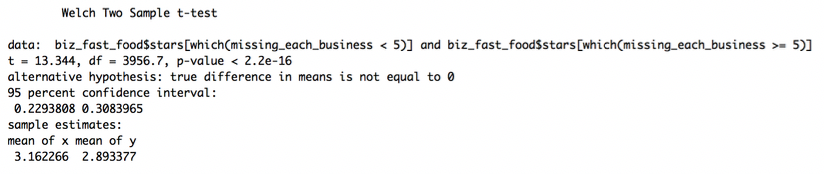

Before carrying out any analyses, the missing attributes are imputed using *rpart* with option *method = class* since the business attributes are factor levels. The codes for imputation can be found in **biz_fastfood_final.R**.

### ANOVA Test

An ANOVA model is fitted for star ratings on the business attributes and the results are as follows. The p-values of the two attributes **RestaurantsTakeOut** and **WiFi** are not significant. Removing **WiFi** from the model give a non-significant p-value for **RestaurantsTakeOut**. However, a comparison between full model and reduced model shows that the full model is a better fit (p-value for the test is 0.000137).

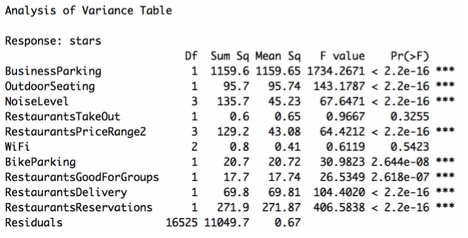

### Histograms Comparing Scaled Ratings

The proportion of star ratings for each business attribute is plotted. The codes for these plots and the tests done on business attributes can be found in **biz_fastfood_plots_imputed.R**, the corresponding plots can be found in the file **figures**. One example of plot is shown below. Proportion is used as y-axis because the business attributes data is highly imbalance. Proportion of "False" for 1-star is calculated as $\frac{\text{number of False in 1-star businesses}}{\text{number of 1-star businesses}}$. 

From the following plot for **Business Parking**, the "True" proportion for star ratings 4 and 5 are higher than the "False" proportion while the "False" proportion for star ratings 1 and 2 are much higher than the "True" proportion. For star rating 3, the "True" and "False proportions are similar.  

The next table shows the average star ratings for "True" and "False". The average ratings for "True" and "False" differ by about 0.7. Levene's Test shows that the two samples have unequal variances (p-value < $2.2\times 10^{-16}$ ). A Welch two-sample t-test is done on the star ratings for "True" and "False". The results show that there is a difference in the average star ratings between "True" and "False" (p-value < $2.2\times 10^{-16}$). This suggests that businesses which provide business parkings do have a higher star rating than businesses without business parkings. 

The plots and two-sample t-test results are similar for the attributes **Restaurants Delivery**, **Restaurants Reservations**, **Outdoor Seating**, **Noise Level**, **Restaurants Price Range**, **Bike Parking** and **Restaurants Good For Groups**.

As mentioned earlier, **Restaurants Take Out** and **WiFi** do not have a significant effect on star rating. The following plot shows the "True" and "False" proportions for **Restaurants Take Out**. As shown, the "True" and "False" proportions are similar across all ratings. The average star ratings for "True" and "False" in the next table are similar. Levene's Test shows that the two samples have equal variances (p-value = 0.07023 ). A two-sample t-test is done on the star ratings for "True" and "False". The results show that there is no difference in the average star ratings between "True" and "False" (p-value = 0.8811). 

There are three levels in **WiFi** - "No", "Free" and "Paid". The following plot shows the corresponsing proportions for **WiFi**. As shown, the "No" and "Paid" proportions are similar across all ratings. The proportion of "Free" is higher in ratings 4 and 5 than in ratings 1 and 2 while the "No" and "Paid" proportions are higher in ratings 1 and 2 than in ratings 4 and 5.

The average star ratings for "No" and "Paid" in the next table are similar and are a little different from the average star rating for "Free". Tukey HSD test below shows that there is a significant difference in average rating between"No" and "Free".

These results show that all business attributes except **WiFi** and **Restaurants Take Out** have an effect on star rating, which tally with the results from the previous section.

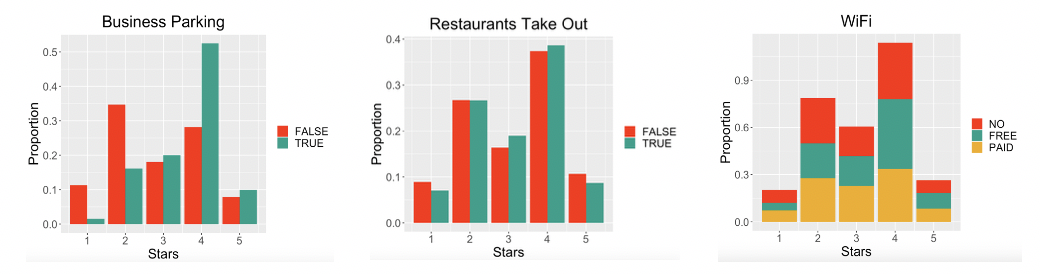

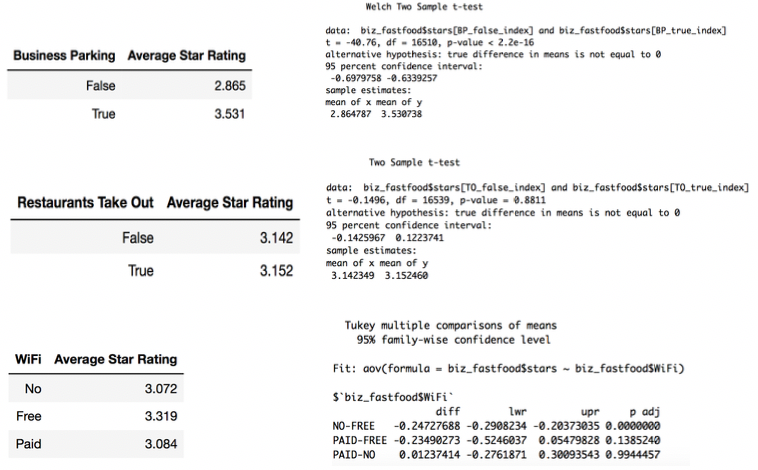

## Review Analysis
### Preprocessing Text Data
#### Vectorizing - TF-IDF
Before we got stared with specific models, we had several steps to prepare our text data.

The first step would be vectorizing. The words needed to be encoded as vectors of integers to use as input to an algorithm. We used TF-IDF to achieve this goal. TF-IDF stands for “Term Frequency – Inverse Document Frequency”, which are the word frequency scores that try to highlight words that are more interesting. 

Term Frequency: This summarizes how often a given word appears within a document.

Inverse Document Frequency: This downscales words that appear a lot across documents.

Basically this method reduced values of common word that are used in different documents. And we used TfidfVectorizer to finish vectorizing texts.


#### Feature extraction
Most machine learning algorithms can’t take in straight text, so we will create a matrix of numerical values to represent our text. As specific word has meaning but when we combine group of words the meaning might get changed, we should also decide on which n-gram to use. Finally, unigram should be the choice by taking into consideration of complexity of algorithm and effects of the model.

#### Tackling Missing Data
For the review data set, there are two kinds of varibales, the star ratings of the restruants and the vectorized reviews. 

1. Missing on ratings
    - There is no way we can imputate on people's reviews. In this case we delete this data in the review analysis part.

2. Missing on response varible
    - We establish a simple Naive Bayes model based on the data with no missing value. The response variable is the star ratings and the predictors are the vectorized reviews. The training accuracy and test accuracy of the model is 61% and 63%, indicating that our that our model does not suffer from overfitting. The relatively low accuracy of this model is due to the fact that the number of our target catogory is 5, increasing the difficulty of our model to precisely put one review to the respective rating category. Apart from this, this model makes sense and could be used to fill out the missing values with missing value on star ratings. 
    
### Doc2Vec Model

The principle of Doc2Vec Model can be summarized according to *Le and Mikolov(2014)*, “every paragraph is mapped to a unique vector, represented by a column in matrix D and every word is also mapped to a unique vector, represented by a column in matrix W. The paragraph vector and word vectors are averaged or concatenated to predict the next word in a context… The paragraph token can be thought of as another word. It acts as a memory that remembers what is missing from the current context — or the topic of the paragraph.”

More specifically, we apply the DMC(Distributed Memory Concatenation) model, where the paragraph vectors are obtained by training a neural network on the task of inferring a center word based on context words and a context paragraph. More importantly, the DMC model has the inner function **most_similar**. That is, after training over a DMC model (*model_dmc*), if we query for *model_dmc.is_similar('good')* it will return words including perfect, terrific, incredible, etc. This is an extremely useful feature because for instance if we find the word 'avocado' important for getting high reviews, by finding its similar words (according to the result: guacamole, pinapple, etc.), we can further suggests the owners also includes these similar gradients to their menus. 

### Rules for Determining Words' Significance

After find some key words, the next thing we should do is to set up rules to determine whether this word is significant in terms of improving/decreasing resturants' ratings. Here, we set up two rules:

1. The proportion of the positive ratings is 0.1 larger than the proportion of positive ratings in the review data set.

2. The proportion of the positive words nearby compared with the negative words nearby is 90% larger.


### Histograms Comparing Scaled Ratings

Here we use the example of "truffle fries" to verify that it is important in positive ratings and therefore resturants are recommended to include it in their menu. The y-axis the plot is the proportion of the rating with the words "truffle fries" minus the proportion of the rating given the whole review data set. According to the plot, the proportion of the 3, 4 and 5 ratings are all larger while that of 1 and 2 ratings are smaller, indicating the positivity of "truffle fries". What's more, after finding both the positive and negative words nearby, the proportion of positive words is 95%, further indicating that business owners are adviced to include this in their menu for higher ratings. 

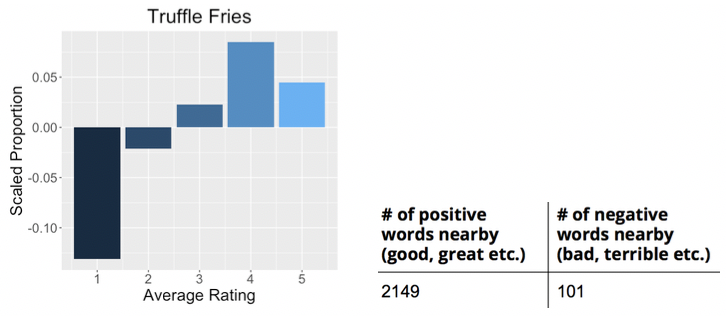

### Provide recommendation based on the business attributes they provided

First, we checked if there were any missing values in the attributes. We had several hypothesis that the number of missing attributes would affect the ratings of restaurants. By testing the hypothesis, reducing missing values would significantly improve the ratings of fast food restaurant.(检验结果) And within the attributes we researched, we found to improve the quality of attributes would also result in better ratings. For example, the ratings of stores with free WiFi were significantly higher than that of stores with paid WiFi.(检验结果)Based on these results, We encourage business owners to refine their attributes as much as possible.

### Extract important features from their reviews and provide suggestions on it

Then we extracted information from the reviews of each fast food restaurant and gave them specific advice. 

To achieve this goal, we first decided on a list of keywords. This list contained words from 12 aspects, including time, service, salty, oily, overcook, undercook, bland, vinegary, restroom, floor, napkin, and environment. Next, we calculated the proportion of the appearance of these words in the positive and negative reviews. Basically, we calculated the frequency scores of these specific words. For example, when calculating the score of "filthy", which indicating sanitation problem of a restaurant, we counted how many times this word appear in a negative review and adjusted the score by the length of the review. Adding up all the scores in a negative reviews would result in our final score. Sometimes a word appears in the positive reviews, and we would subtract some scores from the total score of a specific word. As a matter of fact, the higher the proportion score was, the more serious the problem was with that specific restaurant. By setting some threshold on the proportion scores, we confirmed the severity of the problems and gave specific suggestions in our APP.

## Advantages and Drawbacks
#### Advantages

1. The recommendations we give are feasible and actionable.

2. For verifying the significance of certain attributes or words, we introduce different methods, guranteeing the accuracy of our measurement. 

3. Taking into consideration different people's rating preference and data imbalance when comparing ratings.

3. The results are clearly plotted and highly readable.

4. The Shiny APP we create guarantees great user experience. 

#### Drawbacks and Future Improvement

1. For predicting ratings, the prediction accuracy could increase. This can be solved by extracting or including more important features (e.g. length of the text) and using more advanced models.

2. The Doc2Vec model can only find similar uni-gram word of the given word(s). 

## Link to Shiny APP